<a href="https://colab.research.google.com/github/enps2015/TelosSimuladorNivel4/blob/main/simuladorLevel04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulator Télos - Nível 4 Trilha de Dados**

1. Raspagem de Dados IMDB

2. KPIs com Base da NBA

**Contextualização**

Aprendemos que a análise de dados oferece insights valiosos para a
tomada de decisões, e que coletar e tratar os dados corretamente é
fundamental para que possamos elaborar os KPIs. Portanto, vamos
praticar?

__________

**Projeto Análise dos 25 Melhores Filmes do IMDB**

**Objetivos:**

O objetivo deste projeto é analisar os 25 melhores filmes do ranking IMDB para entender o que faz um filme ser considerado "excelente". Esta análise nos ajudará a responder algumas perguntas importantes para a indústria cinematográfica e para os amantes do cinema.

**Perguntas de negócio e KPIs:**

**Qual é a relação entre idade do filme e sua nota?**

  **KPI:** correlação entre Ano e Nota

**Como a classificação indicativa se relaciona com a avaliação do filme?**

  **KPI:** Nota Média por faixa etária

In [ ]:
# Importação das bibliotecas necessárias
import requests
from requests.exceptions import HTTPError
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

**Verificando o robots.txt**

É preciso verificar, no robots.txt do site, se é permitida a coleta de Dados usando raspagem de dados

In [ ]:
URL = 'https://www.imdb.com/robots.txt'

try:
    response = requests.get(URL)
    response.raise_for_status()

    robots = response.text
    print(robots)

except requests.exceptions.RequestException as e:
    print(f"Erro ao acessar {URL}: {e}")

# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /list/ls*/export
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft
Disallow: /name/nm*/fil

**Iniciando a Raspagem dos Dados**

Baixando todo o conteúdo da página para um arquivo HTML, para depois ler com bs4

In [ ]:
conteudo = None

URL = 'https://www.imdb.com/chart/top'

# Definindo um cabeçalho de usuário para simular um navegador
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

try:
    # requisição para obter o conteudo da pagina
    response = requests.get(URL, headers=headers)

    #verificando se houve algum erro durante a requisição
    response.raise_for_status()

    # Obtendo o conteudo da página
    conteudo = response.content

except HTTPError as http_err:
    print(f'Ocorreu um erro HTTP: {http_err}')
except Exception as err:
    print(f'Ocorreu um erro: {err}')

# validando o resultado
if conteudo is not None:
    print("Conteúdo da página baixado com sucesso!")
else:
    print("Falha ao baixar o conteúdo da página.")


Conteúdo da página baixado com sucesso!


In [ ]:
pagina = BeautifulSoup(conteudo, 'html.parser')

print("HTML carregado com sucesso!")

HTML carregado com sucesso!


**Criando o DataFrame**

utilizando Pandas pra criar um dataframe dos dados em html

In [ ]:
# Criando uma lista para armazenar os detalhes de cada filme
lista_filmes = []

# Encontrando todos os elementos que contêm os títulos dos filmes
titulos = pagina.find_all('a', class_='ipc-title-link-wrapper')

# Extraindo o conteúdo dos filmes
for titulo in titulos:
    # Extraindo o título do filme (usando o <h3>)
    nome_filme = titulo.find('h3', class_='ipc-title__text').get_text(strip=True)

    # Extraindo o ano, a duração e a classificação indicativa
    pai = titulo.find_parent('li', class_='ipc-metadata-list-summary-item')

    metadata_elemento = pai.find('div', class_='sc-b189961a-7 btCcOY cli-title-metadata')

    ano = metadata_elemento.find_all('span', class_='sc-b189961a-8')[0].get_text(strip=True)
    duracao = metadata_elemento.find_all('span', class_='sc-b189961a-8')[1].get_text(strip=True)
    classificacao = metadata_elemento.find_all('span', class_='sc-b189961a-8')[2].get_text(strip=True)

    nota = pai.find('span', class_='ipc-rating-star--rating').get_text(strip=True)

    # Criando um dicionário com as informações do filme
    filmes_info = {
        'Título': nome_filme,
        'Ano': ano,
        'Duração': duracao,
        'Classificação Indicativa': classificacao,
        'Nota': nota
    }

    # Adicionando o dicionário à lista de filmes
    lista_filmes.append(filmes_info)

# Criando um DataFrame (Pandas) para melhor exibição
df_filmes = pd.DataFrame(lista_filmes)


In [ ]:
# Transformando o dataframe para CSV
df_filmes.to_csv('filmes_imdb.csv', index=False)

In [ ]:
# Exibindo o DataFrame
df_filmes


,Título,Ano,Duração,Classificação Indicativa,Nota
0,1. Um Sonho de Liberdade,1994,2h 22m,16,9.3
1,2. O Poderoso Chefão,1972,2h 55m,14,9.2
2,3. Batman: O Cavaleiro das Trevas,2008,2h 32m,12,9.0
3,4. O Poderoso Chefão II,1974,3h 22m,14,9.0
4,5. 12 Homens e uma Sentença,1957,1h 36m,Livre,9.0
5,6. O Senhor dos Anéis: O Retorno do Rei,2003,3h 21m,14,9.0
6,7. A Lista de Schindler,1993,3h 15m,14,9.0
7,8. Pulp Fiction: Tempo de Violência,1994,2h 34m,18,8.9
8,9. O Senhor dos Anéis: A Sociedade do Anel,2001,2h 58m,12,8.9
9,10. Três Homens em Conflito,1966,2h 41m,14,8.8


In [ ]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Título                    25 non-null     object
 1   Ano                       25 non-null     object
 2   Duração                   25 non-null     object
 3   Classificação Indicativa  25 non-null     object
 4   Nota                      25 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


**Preparação dos Dados**

In [ ]:
# Carregando o dataset
df = pd.read_csv('filmes_imdb.csv')

# Função para conerter Classificação Indicatia
def converter_classificacao(classificacao):
    if classificacao =='Livre':
        return 0
    elif classificacao.isdigit():
        return int(classificacao)
    else:
        return 18 # Para casos não numérios

# Função para coverter Duração
def converter_duracao(duracao):
    horas, minutos = duracao.split('h')
    return int(horas) * 60 + int(minutos.strip('m'))

# Criando um novo DataFrame com as informações tratadas
df_filmes_tratados = df.copy()

# Aplicando as conversões
df_filmes_tratados['Classificação Indicativa'] = df_filmes_tratados['Classificação Indicativa'].apply(converter_classificacao)
df_filmes_tratados['Duração'] = df_filmes_tratados['Duração'].apply(converter_duracao)
df_filmes_tratados['Ano'] = df_filmes_tratados['Ano'].astype(int)
df_filmes_tratados['Nota'] = df_filmes_tratados['Nota'].astype(float)

# Verificando os tipos de dados
df_filmes_tratados.dtypes

# Exibindo as primeiras linhas do DataFrame tratado
df_filmes_tratados.head(25)

,Título,Ano,Duração,Classificação Indicativa,Nota
0,1. Um Sonho de Liberdade,1994,142,16,9.3
1,2. O Poderoso Chefão,1972,175,14,9.2
2,3. Batman: O Cavaleiro das Trevas,2008,152,12,9.0
3,4. O Poderoso Chefão II,1974,202,14,9.0
4,5. 12 Homens e uma Sentença,1957,96,0,9.0
5,6. O Senhor dos Anéis: O Retorno do Rei,2003,201,14,9.0
6,7. A Lista de Schindler,1993,195,14,9.0
7,8. Pulp Fiction: Tempo de Violência,1994,154,18,8.9
8,9. O Senhor dos Anéis: A Sociedade do Anel,2001,178,12,8.9
9,10. Três Homens em Conflito,1966,161,14,8.8


In [ ]:
# informações Gerais do dataSet
df_filmes_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Título                    25 non-null     object 
 1   Ano                       25 non-null     int64  
 2   Duração                   25 non-null     int64  
 3   Classificação Indicativa  25 non-null     int64  
 4   Nota                      25 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [ ]:
# Estatísticas Descritivas básicas do dataSet
df_filmes_tratados.describe()

,Ano,Duração,Classificação Indicativa,Nota
count,25.000000,25.000000,25.00000,25.000000
mean,1988.440000,154.080000,12.40000,8.816000
std,18.175258,28.855849,5.09902,0.195107
min,1946.000000,96.000000,0.00000,8.600000
25%,1975.000000,133.000000,12.00000,8.700000
50%,1994.000000,148.000000,14.00000,8.800000
75%,2001.000000,175.000000,14.00000,9.000000
max,2014.000000,207.000000,18.00000,9.300000


**Análise exploratória**

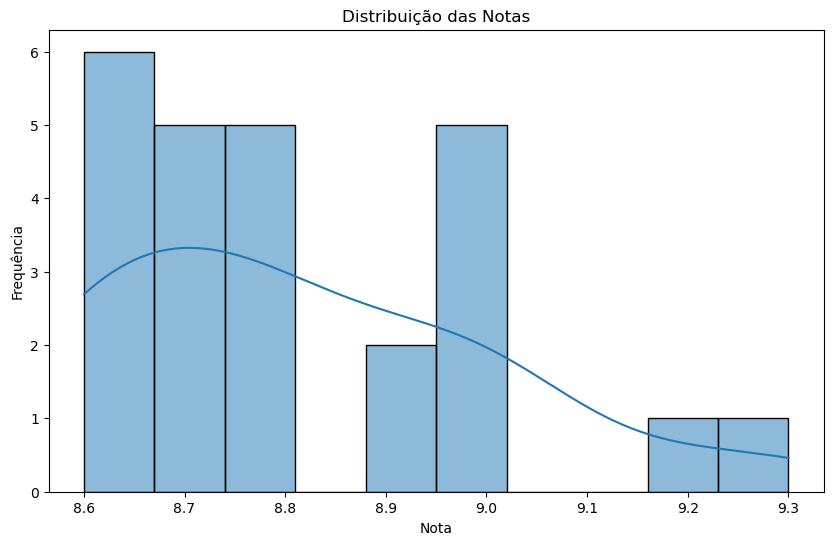

In [ ]:
# Vamos começar com visualizações Básicas
# Histograma das Notas
plt.figure(figsize=(10, 6))
sns.histplot(df['Nota'], bins=10, kde=True)
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

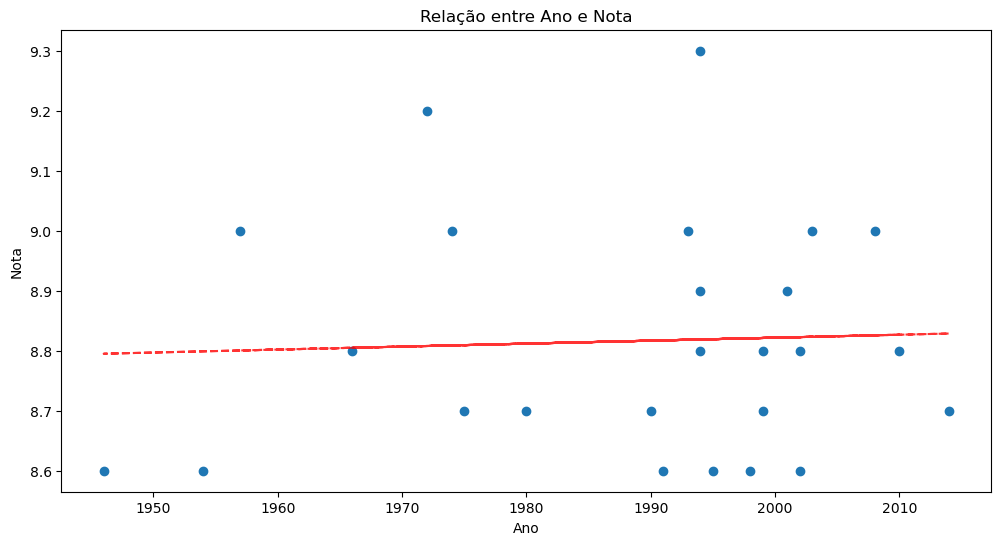

In [ ]:
# Gráfico de dispersão: Ano vs Nota
plt.figure(figsize=(12, 6))
plt.scatter(df['Ano'], df['Nota'])

# Adicionando linha de tendência
z = np.polyfit(df['Ano'], df['Nota'], 1)
p = np.poly1d(z)
plt.plot(df['Ano'], p(df['Ano']), "r--", alpha=0.8)

plt.title('Relação entre Ano e Nota')
plt.xlabel('Ano')
plt.ylabel('Nota')
plt.show()

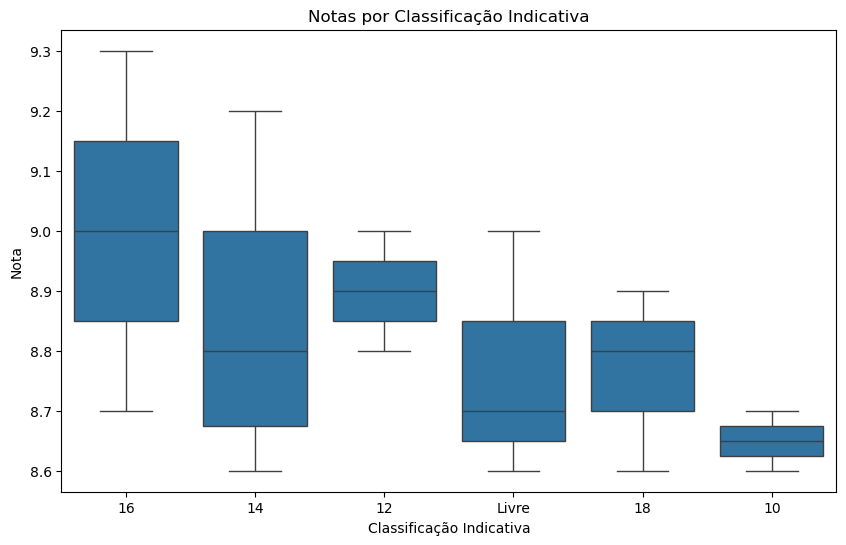

In [ ]:
# Boxplot das notas por classificação indicativa
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classificação Indicativa', y='Nota', data=df)
plt.title('Notas por Classificação Indicativa')
plt.show()

**Análise Diagnóstica**

In [ ]:
# Correlação entre variáveis numéricas
correlacao = df_filmes_tratados[['Ano', 'Duração', 'Nota']].corr()
print("Matriz de Correlação:")
print(correlacao)

Matriz de Correlação:
              Ano   Duração      Nota
Ano      1.000000  0.090261  0.046107
Duração  0.090261  1.000000  0.258053
Nota     0.046107  0.258053  1.000000


In [ ]:
# Calculando a nota média por década
df['Década'] = (df['Ano'] // 10) * 10
nota_media_decada = df.groupby('Década')['Nota'].mean()
print("\nNota Média por Década:")
print(nota_media_decada)


Nota Média por Década:
Década
1940    8.600000
1950    8.800000
1960    8.800000
1970    8.966667
1980    8.700000
1990    8.800000
2000    8.860000
2010    8.750000
Name: Nota, dtype: float64


**Análise Geral e Insights**

Focaremos em dois KPIs principais: A Qualidade dos Filmes ao Longo do Tempo e a relação entre Classificação Indicativa e as Notas dos Filmes.

O conjunto de dados, obtido através de web scraping do site do IMDB, da lista dos TOP 250 Melhores Filmes, foi obtido  no dia 25/09/2024.

**1. Qualidade dos Filmes ao longo do tempo (KPI 1):**

Nossa base de dados apresenta uma boa variação temporal, com filmes desde 1946 até 2014.
Olhando para o gráfico de  dispersão Ano x Nota, percebe-se que o tempo tem pouca influência na qualidade do filme.
A linha de tendência é praticamente horizontal, o que significar que filmes antigos podem ser tão bons quanto os filmes mais novos.

A correlação entre Ano e Nota é de 0.046, o que é uma correlação bem baixa e fraca. Isso significa que não há uma relação forte entre o ano de lançamento
e anota do filme.

Outra coisa bem interessante é a nota média desses filmes, que é de 8.81, o que é bem alto. O filme com menor nota tem 8.6 e o melhor tem 9.3.

**2. relação entre Classificação indicativa e Notas (KPI 2)**

Olhando para o gráfico de Boxplot, percebemos que os filmes com classificação 16 anos parecem ter notas um pouco mais altas em média.

O interessante é que filmes Livres e filmes para 18 anos tem uma distribuição de notas bem parecida. Indicando que a classificação indicativa não determina a qualidade do filme!

A correlação entre Duração e Nota é de 0.258, o que é um pouco maior que a correlação com o Ano, mais ainda é uma correlação fraca.

O que podemos concluir? Filmes excelentes podem vir de qualquer época e ter diferentes classificações indicativas. A qualidade de um filme é algo complexo que não depende só de quando ele foi feito ou para que idade ele é recomendado.

__________

**Projeto de Análise de Dados da NBA para Sacramento Kings**

**Objetivos:**

Analisar dados dos jogadores da NBA para fornecer insights estratégicos ao presidente do time Sacramento Kings, visando melhorar o desempenho da equipe e otimizar decisões de contratação e desenvolvimento de jogadores.

**Perguntas de negócio e KPIs:**

**1. Como o Sacramento Kings se compara aos outros times em termos de rating dos jogadores?**
  
  **KPI:**
  - Rating Médio dos Jogadores do Sacramento Kings
  - Posição do Sacramento Kings no ranking de rating médio

**2. Qual a relação entre a experiência dos jogadores e seus salários?**

  **KPI:**
   - Coeficiente de Correlação entre Experiência e Salário

**Carregamento e análise inicial dos dados**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter

# Carregando os dados
df = pd.read_csv('Simulador_Nivel_4.csv')

# Exibimdo informações gerais sobre o dataset
print('Informações gerais sobre o dataset\n')
df.info()

print("\nEstatísticas descritivas:")
df.describe()

Informações gerais sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.1+ KB

Estatísticas descritivas:


,rating,draft_year
count,429.000000,429.000000
mean,76.372960,2014.093240
std,5.657748,3.937678
min,67.000000,2001.000000
25%,72.000000,2012.000000
50%,75.000000,2015.000000
75%,79.000000,2017.000000
max,97.000000,2019.000000


In [ ]:
# Verificando valores ausentes
print('Verificando os valores ausentes/nulos')
df.isnull().sum()

Verificando os valores ausentes/nulos


full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
dtype: int64

In [ ]:
# Tratar valores ausentes
df = df.dropna(subset=['team', 'position'])
df['college'] = df['college'].fillna('Não Informado')

# Converter "salary" para numérico
df['salary'] = df['salary'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x))).astype(float)

# Converter "weight" (libras) para "peso_kg" (kg)
# Extrair apenas os números da string usando expressões regulares
df['weight'] = df['weight'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x))[0] if re.findall(r'\d+\.?\d*', str(x)) else None)
df['peso_kg'] = df['weight'].astype(float) * 0.453592

# Converter "draft_round" para numérico (tratar "Undrafted" como 0)
df['draft_round'] = pd.to_numeric(df['draft_round'], errors='coerce').fillna(0).astype(int)

# Criar coluna "experiencia" (anos desde o draft)
df['experiencia'] = 2023 - df['draft_year']

# Criar o DataFrame df_tratado (sem a coluna "height")
df_tratado = df[['full_name', 'rating', 'jersey', 'team', 'position', 'b_day',
                       'peso_kg', 'salary', 'country', 'draft_year', 'draft_round',
                       'draft_peak', 'college', 'experiencia']]

df_tratado

,full_name,rating,jersey,team,position,b_day,peso_kg,salary,country,draft_year,draft_round,draft_peak,college,experiencia
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,113.398000,37436858.0,USA,2003,1,1,Não Informado,20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,102.058200,32742000.0,USA,2011,1,15,San Diego State,12
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,109.769264,25842697.0,Greece,2013,1,15,Não Informado,10
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,104.326160,37199000.0,USA,2007,1,2,Texas,16
4,James Harden,96,#13,Houston Rockets,G,08/26/89,99.790240,38199000.0,USA,2009,1,3,Arizona State,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,81.646560,522738.0,USA,2018,0,Undrafted,Florida Gulf Coast,5
425,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,90.718400,79568.0,USA,2015,2,60,Florida,8
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,90.718400,79568.0,Greece,2018,0,Undrafted,Dayton,5
427,Jalen Lecque,68,#0,Phoenix Suns,G,06/13/00,86.182480,898310.0,USA,2019,0,Undrafted,Não Informado,4


In [ ]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_name    406 non-null    object 
 1   rating       406 non-null    int64  
 2   jersey       406 non-null    object 
 3   team         406 non-null    object 
 4   position     406 non-null    object 
 5   b_day        406 non-null    object 
 6   peso_kg      406 non-null    float64
 7   salary       406 non-null    float64
 8   country      406 non-null    object 
 9   draft_year   406 non-null    int64  
 10  draft_round  406 non-null    int64  
 11  draft_peak   406 non-null    object 
 12  college      406 non-null    object 
 13  experiencia  406 non-null    int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 47.6+ KB


**Algumas informações Gerais sobre o Dataset**

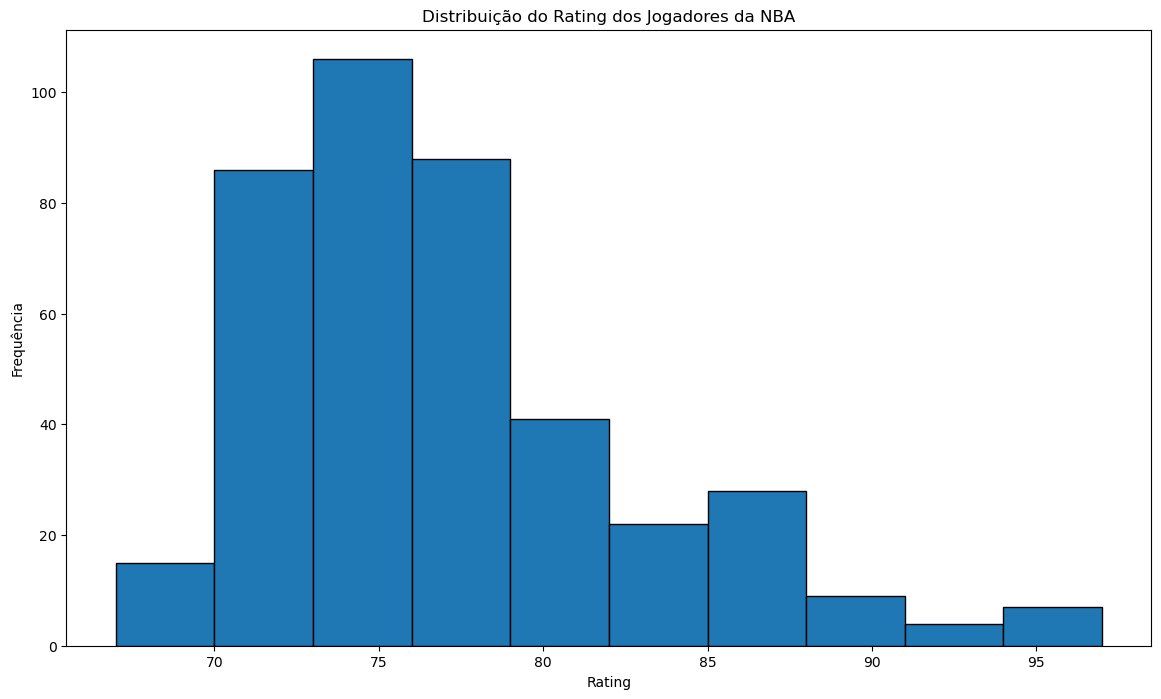

In [ ]:
# Distribuição do Rating dos jogadores
plt.figure(figsize=(14, 8))
plt.hist(df_tratado['rating'], bins=10, edgecolor='black')
plt.title('Distribuição do Rating dos Jogadores da NBA')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.show()

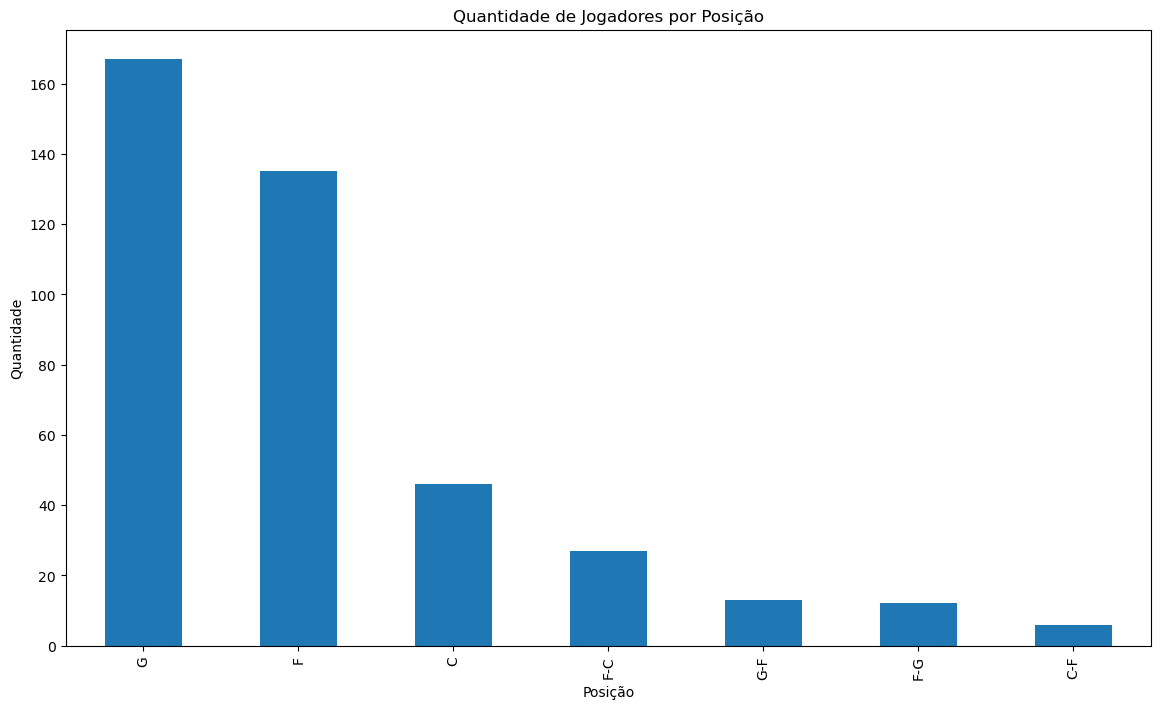

In [ ]:
# Jogadores por Posição
plt.figure(figsize=(14, 8))
df_tratado['position'].value_counts().plot(kind='bar')
plt.title('Quantidade de Jogadores por Posição')
plt.xlabel('Posição')
plt.ylabel('Quantidade')
plt.show()

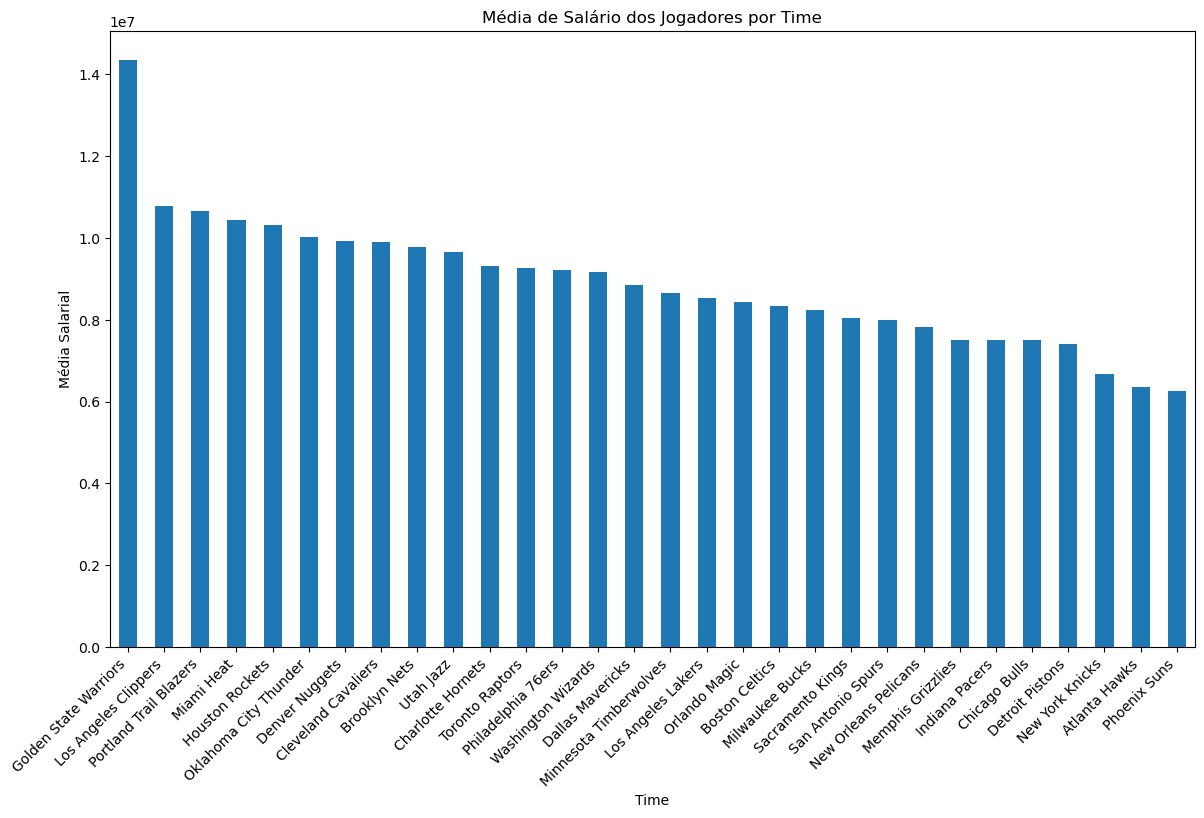

In [ ]:
# Média de salário por Time
plt.figure(figsize=(14, 8))
df_tratado.groupby('team')['salary'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Média de Salário dos Jogadores por Time')
plt.xlabel('Time')
plt.ylabel('Média Salarial')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo X para melhor visualização
plt.show()

In [ ]:
# Agrupa os jogadores por país e conta a quantidade
jogadores_por_pais = df_tratado['country'].value_counts().reset_index()
jogadores_por_pais.columns = ['country', 'count']

# Cria o mapa geográfico com bolhas
fig = go.Figure(data=go.Scattergeo(
    locationmode = 'country names', # Define o modo de localização como nomes de países
    locations = jogadores_por_pais['country'],
    text = jogadores_por_pais['country'],
    mode = 'markers',
    marker = dict(
        size = jogadores_por_pais['count'] * 5,  # Aumenta o tamanho das bolhas
        sizeref=2.*max(jogadores_por_pais['count'])/(40.**2),
        sizemode='area',
        color = jogadores_por_pais['count'],
        colorscale = 'Viridis',
        cmin = 0,
        cmax = jogadores_por_pais['count'].max(),
        colorbar_title="Número de Jogadores",
        line_color='rgb(40,40,40)',
        line_width=0.5,
        sizemin = 4
    )))

fig.update_layout(
    title_text = 'Distribuição de Jogadores da NBA pelo Mundo',
    geo = dict(
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitcolor = 'rgb(255, 255, 255)',
        countrycolor = 'rgb(255, 255, 255)',
        countrywidth = 0.5,
        subunitwidth = 0.5,
        showframe = False, # Remove a moldura do mapa
        projection_type = 'natural earth' # Define a projeção do mapa
    ),
    height=600, # Define a altura da janela do mapa (em pixels)
    width=1000  # Define a largura da janela do mapa (em pixels)
)

fig.show()

**Pergunta de Negócio 1: Como está a performance do Sacramento Kings em relação aos outros times da NBA em termos de rating dos jogadores?**

**KPIs:**

 - Rating Médio do Sacramento Kings:

 - Posição do Sacramento Kings no Ranking de Rating Médio:

In [ ]:
# Calcula a média de rating para cada time e ordena em ordem decrescente
ranking_rating = df_tratado.groupby('team')['rating'].mean().sort_values(ascending=False)

ranking_rating.head(20)



team
Los Angeles Clippers      79.285714
Golden State Warriors     79.111111
Brooklyn Nets             78.714286
Utah Jazz                 78.333333
Los Angeles Lakers        77.800000
Denver Nuggets            77.769231
Houston Rockets           77.692308
Portland Trail Blazers    77.500000
Sacramento Kings          77.428571
Philadelphia 76ers        77.285714
Boston Celtics            77.000000
Dallas Mavericks          76.866667
San Antonio Spurs         76.857143
Cleveland Cavaliers       76.583333
Milwaukee Bucks           76.411765
New Orleans Pelicans      76.400000
Toronto Raptors           76.384615
Indiana Pacers            76.266667
Atlanta Hawks             76.166667
Miami Heat                75.750000
Name: rating, dtype: float64

In [ ]:
# Encontra a posição do Sacramento Kings no ranking
posicao_kings = ranking_rating.index.get_loc('Sacramento Kings') + 1
print(f"Posição do Sacramento Kings no ranking de rating médio: {posicao_kings}")

Posição do Sacramento Kings no ranking de rating médio: 9


**Pergunta de Negócio 2: Qual a relação entre a experiência dos jogadores e seus salários?**

**KPIs:**

 - Coeficiente de Correlação entre Experiência e Salário:

 - Calcula o coeficiente de correlação entre as colunas "experiencia" e "salary". Um valor positivo indica uma correlação positiva (jogadores mais experientes tendem a ter salários mais altos), enquanto um valor negativo indica uma correlação negativa.



In [ ]:
# Coefiiente de correlação entre Experiência e Salario
corr1 = df_tratado['experiencia'].corr(df_tratado['salary'])
print(f" correlação entre Experiência e Salário é: {corr1}")


 correlação entre Experiência e Salário é: 0.534386739487598


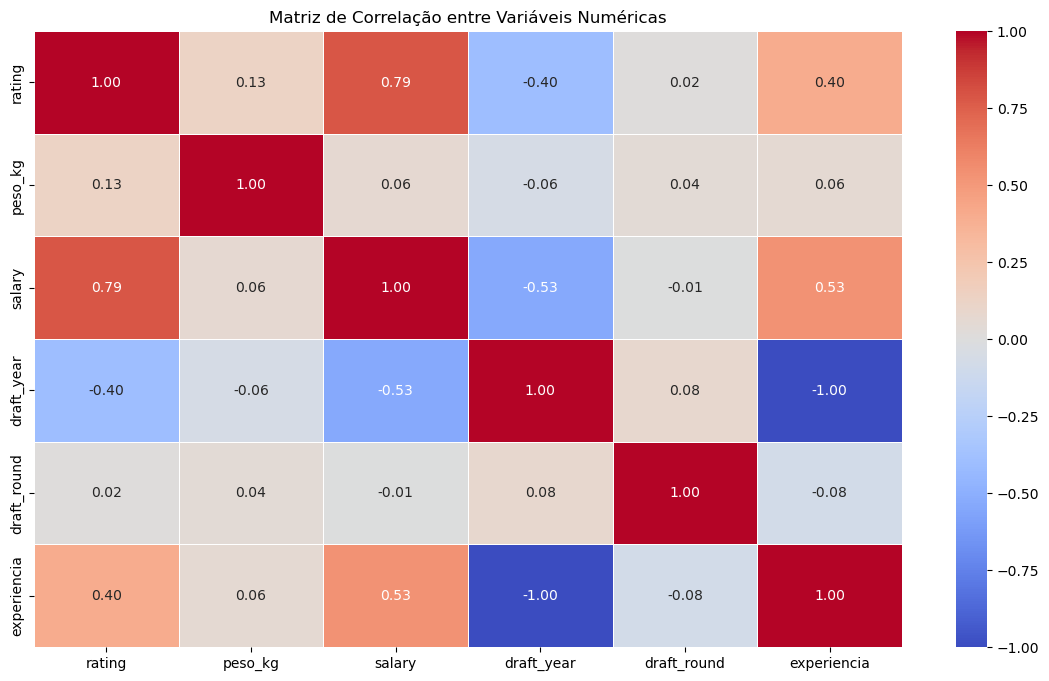

In [ ]:
# Encontrando a correlação entre as variáveis numéricas do dataset tratado

# Selecionando apenas as colunas numéricas do DataFrame
df_numerico = df_tratado.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlacao = df_numerico.corr()

# Criar o mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

**Alguns insights sobre as análises**

O rating médio dos jogadores do Sacramento Kings é 76.81, o que coloca o time na 9ª posição no ranking de rating médio da NBA. Essa posição indica que o time está na metade inferior do ranking em termos de qualidade geral dos jogadores.

O Sacramento Kings precisa investir em jogadores com ratings mais altos para se tornar mais competitivo. Isso pode ser feito por meio do draft, buscando jovens talentos com alto potencial, ou por meio de trocas e contratações de jogadores experientes e de alto nível. Investir em um bom programa de desenvolvimento de jogadores também pode ajudar a elevar o rating dos jogadores do time a longo prazo.


O coeficiente de correlação de 0.53 indica uma correlação positiva moderada entre a experiência e o salário dos jogadores da NBA. Isso sugere que, em geral, jogadores mais experientes tendem a receber salários mais altos. Essa relação faz sentido, pois a experiência geralmente está associada a um maior desenvolvimento de habilidades e, portanto, maior valor para o time.

Ao construir o time, o Sacramento Kings deve considerar a experiência como um fator importante na negociação de salários. Jogadores mais experientes podem trazer mais estabilidade e conhecimento tático ao time, mas também podem exigir salários mais altos. É crucial encontrar um equilíbrio entre experiência e custo-benefício.